## Creating Interesting Bar Plots with Matplotlib

Author: [**Raffi Sahakyan**](https://www.linkedin.com/in/raffi-sahakyan)
MS in Business Aanlytics Candidate at UCLA Anderson

In partial collaboration with Paul Deitel,
as part of the Python Bootcamp session at UCLA Anderson. 

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

In [8]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

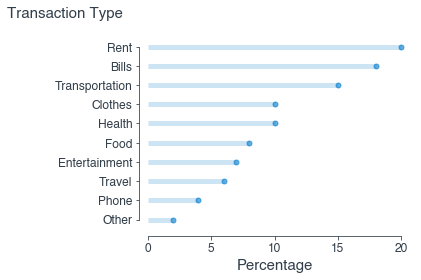

In [5]:
# create some fake data
percentages = pd.Series([20, 15, 18, 8, 6, 7, 10, 2, 10, 4], 
                        index=['Rent', 'Transportation', 'Bills', 'Food', 
                               'Travel', 'Entertainment', 'Health', 'Other', 'Clothes', 'Phone'])
df = pd.DataFrame({'percentage' : percentages})
df = df.sort_values(by='percentage')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Percentage', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Transaction Type', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')